In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

###Завдання 2

In [ ]:
df = pd.read_csv("bank_marketing.csv", sep=";")

###Завдання 3

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


###Завдання 4

In [ ]:
df.job.unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [ ]:
dfvc = df.job.value_counts()
dfvc

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

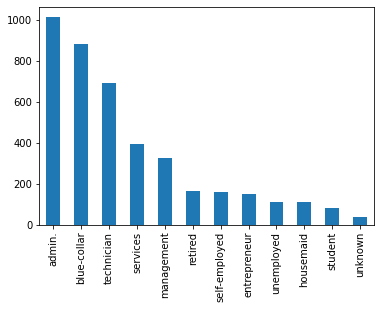

In [ ]:
dfvc.plot.bar()

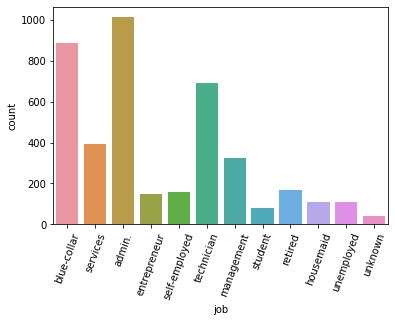

In [ ]:
sns.countplot(x = "job", data = df)
plt.xticks(rotation = 70);

###Завдання 5

In [ ]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
dfy = df.y.value_counts()
dfy

no     3668
yes     451
Name: y, dtype: int64

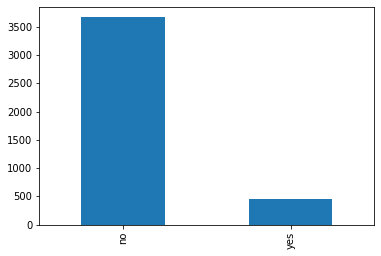

In [ ]:
dfy.plot.bar()


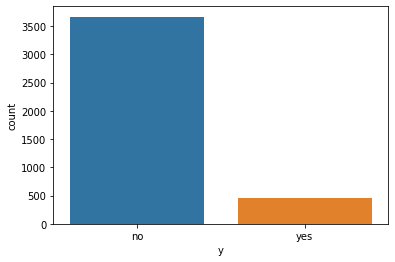

In [ ]:
sns.countplot(x = 'y', data = df)

In [13]:
print("Відсоток людей, які погодились рідписати депозит:")
df.y[df.y == 'yes'].count() / df.y.count() * 100

Відсоток людей, які погодились рідписати депозит:


10.949259529011895

###Завдання 6

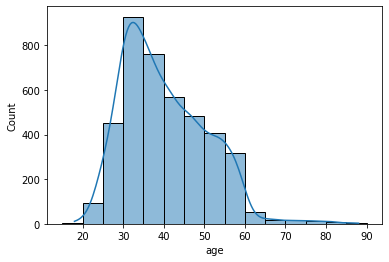

In [14]:
sns.histplot(x = "age", data = df, binwidth = 5, binrange = [15, 90], kde = True, stat = "count")

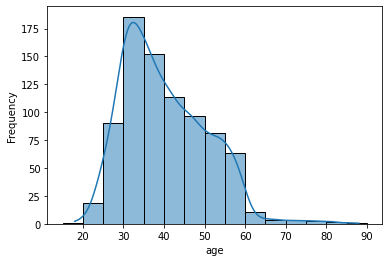

In [15]:
sns.histplot(x = "age", data = df, binwidth = 5, binrange = [15, 90], kde = True, stat = "frequency")

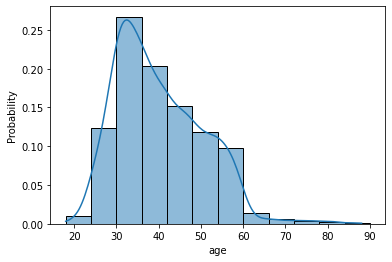

In [16]:
sns.histplot(x = "age", data = df, binwidth = 6, binrange = [18, 88], kde = True, stat = "probability")

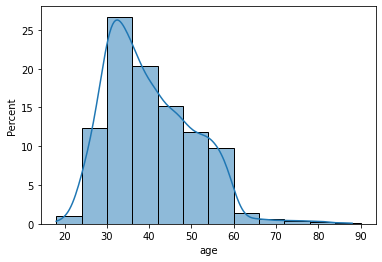

In [17]:
sns.histplot(x = "age", data = df, binwidth = 6, binrange = [18, 88], kde = True, stat = "percent")

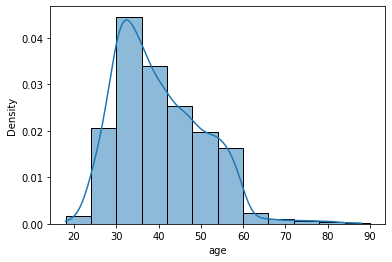

In [18]:
sns.histplot(x = "age", data = df, binwidth = 6, binrange = [18, 88], kde = True, stat = "density")

###Завдання 7

In [20]:
df.loc[:, ['marital', 'y']].value_counts()

marital   y  
married   no     2257
single    no      998
divorced  no      403
married   yes     252
single    yes     155
divorced  yes      43
unknown   no       10
          yes       1
dtype: int64

In [21]:
df.marital[(df.y == 'yes') & (df.marital == 'married')].count() / df.marital[(df.marital == 'married')].count() * 100


10.0438421681945

In [22]:
df.marital[(df.y == 'yes') & (df.marital == 'divorced')].count() / df.marital[(df.y == 'yes')].count() * 100

9.534368070953436

In [23]:
df.marital[(df.y == 'yes') & (df.marital == 'single')].count() / df.y.count() * 100

3.7630492838067493

###Завдання 8

In [25]:
education = (df.education[(df.y == 'yes')].value_counts() / df.education.value_counts())* 100
print(education.sort_values(ascending = False))
print("Максимальна ймовірність серед всіх професій: ", education.index[education.argmax()],"=",education.iloc[education.argmax()],"%")

unknown                15.568862
university.degree      13.053797
professional.course    12.149533
high.school            10.532030
basic.4y                8.857809
basic.9y                7.491289
basic.6y                7.456140
illiterate                   NaN
Name: education, dtype: float64
Максимальна ймовірність серед всіх професій:  unknown = 15.568862275449103 %


###Завдання 9

In [26]:
print((df.poutcome[(df.y == 'yes')].value_counts() / df.poutcome.value_counts())* 100)

failure        14.757709
nonexistent     8.288391
success        64.788732
Name: poutcome, dtype: float64


###Завдання 10

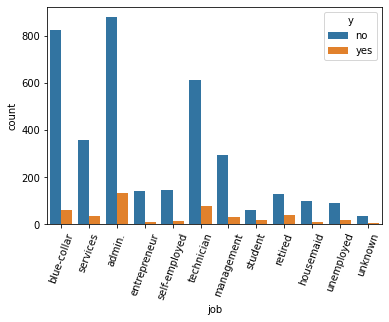

In [27]:
sns.countplot(x = "job", data = df, hue = "y")
plt.xticks(rotation = 70);

###Завдання 11

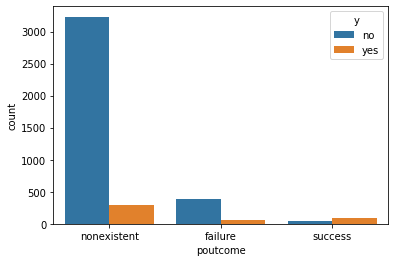

In [28]:
sns.countplot(x = "poutcome", data = df, hue = "y")

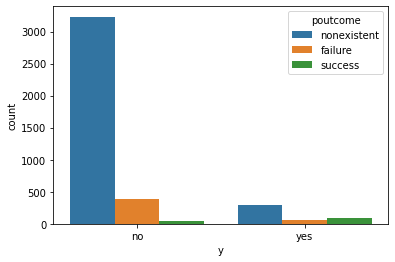

In [29]:
sns.countplot(x = "y", data = df, hue = "poutcome")

###Завдання12

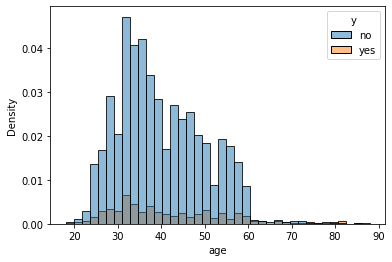

In [35]:
sns.histplot(x = "age", data = df, hue = "y", stat = "density", common_norm = True)

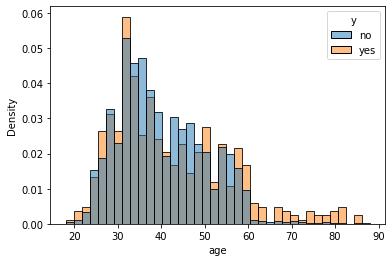

In [31]:
sns.histplot(x = "age", data = df, hue = "y", stat = "density", common_norm = False)

###Завдання 13

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


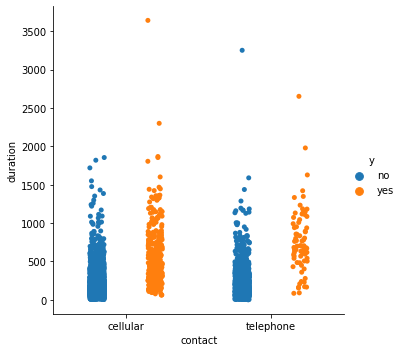

In [37]:
sns.catplot(kind = 'strip', x = "contact", y = "duration", data = df, hue = "y", dodge = True,  size = 5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


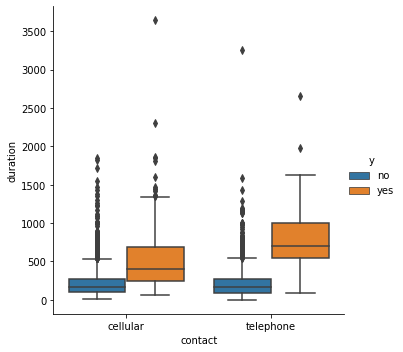

In [33]:
sns.catplot(kind = 'box', x = "contact", y = "duration", data = df, hue = "y", dodge = True,  size = 5)